In [1]:
import os
import pandas as pd
import pickle

In [2]:
from PyDimRed.transform import TransformWrapper
from PyDimRed.plot import display
from sklearn.manifold import TSNE
from PyDimRed.plot import display_heatmap_df
from PyDimRed.plot import display_group
from PyDimRed.utils.dr_utils import reduce_data_with_params
from PyDimRed.evaluation import ModelEvaluator

/home/jaume/miniconda3/envs/pyMultiplex/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jaume/miniconda3/envs/pyMultiplex/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/jaume/miniconda3/envs/pyMultiplex/lib/python3.12/site-packages/trimap/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
# ==== UKB
derivatives_folder = "/media/jaume/DATA/Data/Urblauna_SFTP/UKB_Cardiac_BIDS/derivatives"
data_path = os.path.join(derivatives_folder, 'GraphClassification')
all_edges = 'Edges-True_Norm-ZNorm_Global-True_All-True_Sim-False_BP-False'
aha_edges = 'Edges-True_Norm-ZNorm_Global-True_All-False_Sim-False_BP-False'
# study_name = 'Multiplex_HPT_ACDC_ADAM_FINAL_MAE'

# =========================== ALL ===========================
study_name = 'Multiplex_HPT_UKB_DIMENSIONS_NEW_LOSS_ALL'
all_data_folder = os.path.join(data_path, all_edges, study_name)  # save_folder

# =========================== AHA ===========================
study_name = 'Multiplex_HPT_UKB_DIMENSIONS_NEW_LOSS'
aha_data_folder = os.path.join(data_path, aha_edges, study_name)  # save_folder

save_folder = os.path.join(all_data_folder, 'latent_analysis') 
latent_filename = os.path.join(all_data_folder, 'latent_data.csv')
save_folder = os.path.join(aha_data_folder, 'latent_analysis') 
latent_filename = os.path.join(aha_data_folder, 'latent_data.csv')
reprocess_datasets = True
os.makedirs(save_folder, exist_ok=True)

In [4]:
df_latent = pd.read_csv(latent_filename) # -- Need to identify the subjects!

# Explore correlations between the latent and the biomarkers
df_latent.set_index('Subject', inplace=True)
labels = df_latent[['labels']].copy()

columns_to_drop = ['labels', 'Group', 'Region', 'Sample', 'Cycle', 'ed_cycle_time', 'ed_frame_idx']
latent_drop = [l for l in df_latent.columns if l in columns_to_drop]
df_latent.drop(latent_drop, axis=1, inplace=True)

# Define X and y
X = df_latent.values
y = labels.values.ravel()

In [5]:
params = [{"method" : ["TSNE", "UMAP"], "n_nbrs" : range(2,10,1)}]

results_filename=os.path.join(save_folder, 'results_analysis.pkl')
with open(results_filename, 'rb') as f:
    save_data = pickle.load(f)
bestScore = save_data['bestScore']
bestParams = save_data['bestParams']
results = save_data['results']

Xs_train_reduced, names = reduce_data_with_params(X,y,*params)

/home/jaume/miniconda3/envs/pyMultiplex/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jaume/miniconda3/envs/pyMultiplex/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jaume/miniconda3/envs/pyMultiplex/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jaume/miniconda3/envs/pyMultiplex/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jaume/miniconda3/envs/pyMultiplex/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: F

In [6]:
params = [{"method" : ["PACMAP"]}]

results_filename_pacmap = os.path.join(save_folder, 'results_analysis_pacmap.pkl')
with open(results_filename_pacmap, 'rb') as f:
    save_data = pickle.load(f)
bestScore = save_data['bestScore']
bestParams = save_data['bestParams']
results_pacmap = save_data['results']

Xs_train_reduced_PACMAP, names_PACMAP = reduce_data_with_params(X,y,*params)

In [14]:
results_pacmap

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Transform__method,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.547826,0.027698,0.1359,0.017082,PACMAP,{'Transform__method': 'PACMAP'},0.492754,0.427536,0.445255,0.455182,0.027535,1


In [13]:
a = results.sort_values(by='mean_test_score', ascending=False).iloc[0:5].copy()
print(a[['params', 'mean_test_score']])
print(a['params'].iloc[0])

                                               params  mean_test_score
11  {'Transform__method': 'UMAP', 'Transform__n_nb...         0.556984
3   {'Transform__method': 'TSNE', 'Transform__n_nb...         0.547251
5   {'Transform__method': 'TSNE', 'Transform__n_nb...         0.544818
10  {'Transform__method': 'UMAP', 'Transform__n_nb...         0.527804
4   {'Transform__method': 'TSNE', 'Transform__n_nb...         0.518213
{'Transform__method': 'UMAP', 'Transform__n_nbrs': 5}


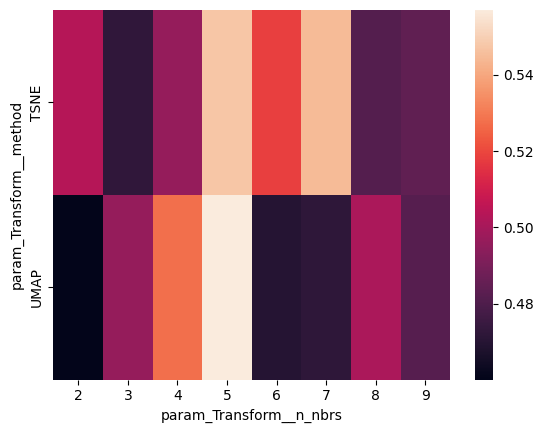

In [9]:
display_heatmap_df(results,'param_Transform__method','param_Transform__n_nbrs', 'mean_test_score')

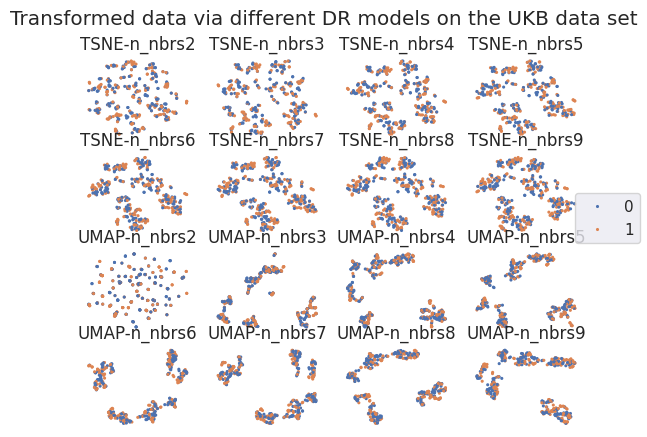

In [12]:
display_group(
    names=names,
    X_train_list=Xs_train_reduced,
    y_train=y,
    nbr_cols=4,
    nbr_rows=4,
    legend="auto",
    title=f"Transformed data via different DR models on the UKB data set"
    )


In [35]:
# ===================== New display group
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas as pd

def display_group2(
    names: list[str],
    X_train_list: list[np.array],
    y_train: np.array,
    X_test_list: list[np.array] = None,
    y_test: np.array = None,
    nbr_cols: int = 3,
    nbr_rows: int = 4,
    marker_size=5,
    legend: str = "full",  # change discrete (categorical) / cts
    title: str = None,
    x_label: str = "x",
    y_label: str = "y",
    hue_label: str = "z",
    grid_x_label: list[str] = None,
    grid_y_label: list[str] = None,
    figsize: tuple = None,
) -> None:
    """
    Given a list of train data (optionally test data) with the same labels (must all be in same order) create a multi scatter plot of all
    data on a grid. If both XtestList and ytest are not None then train data and test data will be differentiated via
    different markers. Another option that can be specified is the use of a 'global' grid on the graph. If grid_x_label or grid_y_label are
    a list of names grid like naming of each suplot will occur

    Args:
    -----
        names (list[str]): Title of each subplot. Subplots don't have titles when default = None

        X_train_list (list[np.array]): List of N x 2 dimensional data sets to be plotted

        ytrain (np.array): N dimensional array of label / output data

        X_test_list (list[np.array]): Optional list of N x 2 dimensional test data sets to be plotted

        ytest (np.array): Optional N dimensional array of label / output data

        nbr_cols (int): Number of columns in the grouped plot, will have at most nbrCols graphs stacked vertically

        nbr_rows (int): Number of rows in the grouped plot, will have at most nbrRows graphs stacked horizontally

        marker_size (int) : size of markers on seaborn.relplot, default=5

        legend (str): seaborn legend argument. "full" show each different value on legend, "auto" will make seaborn decide

        x_label (str): x axis label name

        y_label (str): y axis label name

        hue_label (str): name of color hue variable

        grid_x_label (list[str]) : x-axis labels for global grid of subplots. default = None,

        grid_y_label (list[str]) : y-axis labels for global grid of subplots. default = None

        figsize (tuple): x and y figure size in inches. Default = None

    Returns:
    --------
        None
    """

    N = y_train.shape[0]  # number of train samples

    N_test = 0  # number of test samples
    if X_test_list is not None and y_test is not None:
        N_test = y_test.shape[0]

    # sharex=True,sharey=True
    fig, axs = plt.subplots(ncols=nbr_cols, nrows=nbr_rows, figsize=(10, 10))

    if title is not None:
        fig.suptitle(title)

    sns.set_theme()
    plt.rcParams["savefig.dpi"] = 300
    if figsize is not None:
        plt.rcParams["figure.figsize"] = figsize

    for i in range(nbr_rows):
        for j in range(nbr_cols):
            ax = axs[i, j]
            if i == 0 and grid_x_label is not None:
                ax.set_xlabel(grid_x_label[j])
                ax.xaxis.set_label_position("top")

            if j == 0 and grid_x_label is not None:
                ax.set_ylabel(grid_y_label[i])

            ax.set_frame_on(b=False)
            ax.set_xticks([])
            ax.set_yticks([])
            # axs[i,j].grid(visible=False)
            # axs[i, j].axis('off')

    if X_test_list is not None and y_test is not None:
        Y = np.concatenate((y_train, y_test), axis=0)

    for i, X_train in enumerate(X_train_list):
        ax = axs[i // nbr_cols, i % nbr_cols]

        df_X = None
        df_Y = None

        if X_test_list is not None and y_test is not None:
            N_train, N_test = X_train.shape[0], X_test_list[i].shape[0]

            # Array of ones and zeros that will be concatenated to determine if
            # data point is train or test. 1 = train, 0 = test
            train = np.full(N_train, 0).reshape(-1, 1)

            test = np.full(N_test, 1).reshape(-1, 1)
            # print(f"Train and test size: {train.shape} , {test.shape}")
            train_test_label = np.concatenate(
                (train, test), axis=0)  # .reshape(-1,1)
            # print(f"Concat size : {trainTestLabel.shape}")

            X = np.concatenate((X_train_list[i], X_test_list[i]), axis=0)
            X = np.concatenate((X, train_test_label), axis=1)

            df_X = pd.DataFrame(
                X,
                columns=[
                    x_label,
                    y_label,
                    "train (1) or test (0)"])
            df_Y = pd.DataFrame(Y, columns=[hue_label])

        else:
            df_X = pd.DataFrame(X_train_list[i], columns=[x_label, y_label])
            df_Y = pd.DataFrame(y_train, columns=[hue_label])

        df = pd.concat([df_X, df_Y], axis=1)

        plot = None
        if X_test_list is not None and y_test is not None:
            plot = sns.scatterplot(
                data=df,
                x=x_label,
                y=y_label,
                hue=hue_label,
                s=marker_size,
                style="train (1) or test (0)",
                linewidth=0,
                ax=ax,
                legend=legend,
            )
        else:
            plot = sns.scatterplot(
                data=df,
                x=x_label,
                y=y_label,
                hue=hue_label,
                s=marker_size,
                linewidth=0,
                ax=ax,
                legend=legend,
            )

        ax.get_legend().remove()
        if names is not None:
            plot.set(title=names[i])

    ax = axs[0, 0]
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="center right")
    plt.grid(False)
    plt.tight_layout()
    # plt.show()
    return fig
    

In [36]:
names
new_names = [n.replace('n_nbrs', 'N') for n in names]
new_names

['TSNE-N2',
 'TSNE-N3',
 'TSNE-N4',
 'TSNE-N5',
 'TSNE-N6',
 'TSNE-N7',
 'TSNE-N8',
 'TSNE-N9',
 'UMAP-N2',
 'UMAP-N3',
 'UMAP-N4',
 'UMAP-N5',
 'UMAP-N6',
 'UMAP-N7',
 'UMAP-N8',
 'UMAP-N9']

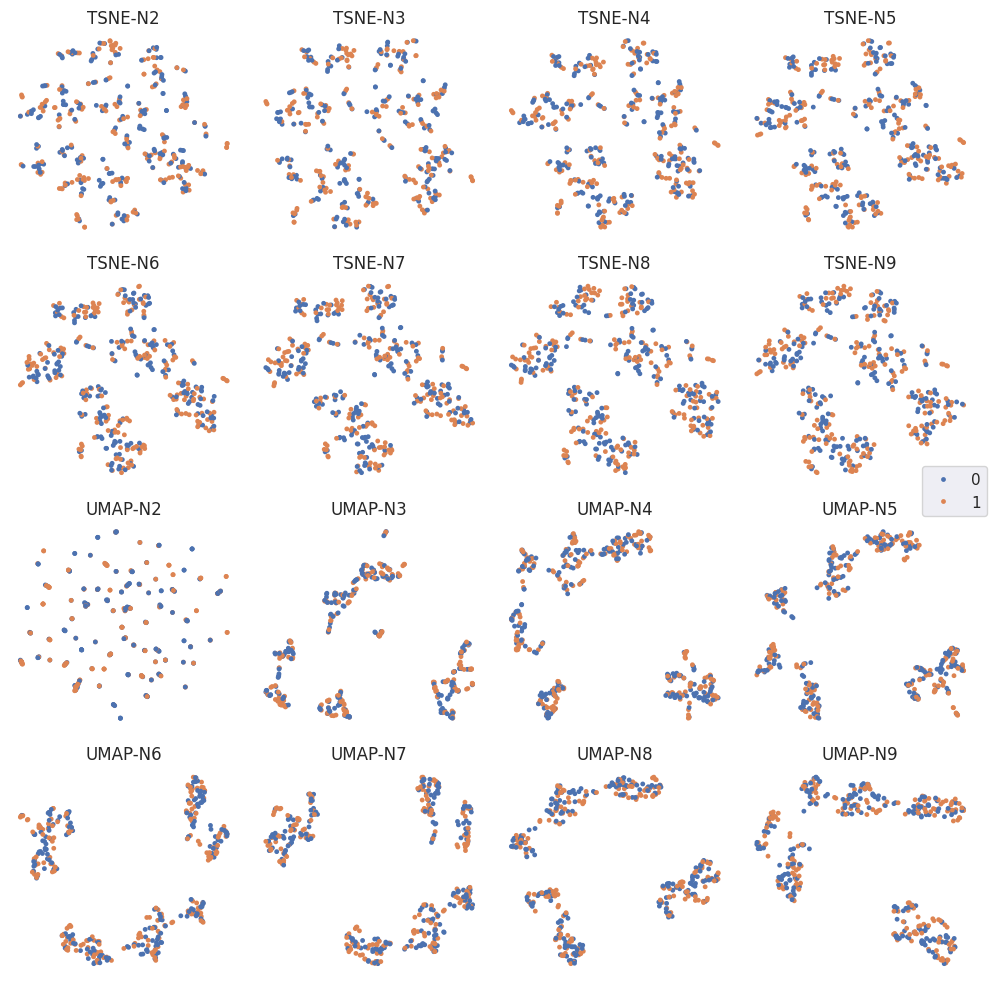

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [37]:
fig_group = display_group2(
    names=new_names,
    X_train_list=Xs_train_reduced,
    y_train=y,
    nbr_cols=4,
    nbr_rows=4,
    marker_size=12,
    legend="auto",
    title=None,
    )
plt.show()

save_filename = os.path.join(save_folder, 'latent_projection_group.eps')
fig_group.savefig(save_filename, format='eps', bbox_inches="tight", dpi=300)